# Подключение библиотек

In [ ]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import random 
from datetime import datetime

from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.preprocessing import StandardScaler, RobustScaler
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import r2_score as r2
from sklearn.model_selection import KFold, GridSearchCV

from warnings import filterwarnings
filterwarnings('ignore')

# Загрузка данных

In [ ]:
test_path = '/content/drive/MyDrive/Курсовой проект/test.csv'
train_path = '/content/drive/MyDrive/Курсовой проект/train.csv'

# Анализ данных

In [ ]:
df_train = pd.read_csv(train_path, sep = ',')
df_train.head()

Id  DistrictId  Rooms      Square  LifeSquare  KitchenSquare  Floor  \
0  11809          27    3.0  115.027311         NaN           10.0      4   
1   3013          22    1.0   39.832524   23.169223            8.0      7   
2   8215           1    3.0   78.342215   47.671972           10.0      2   
3   2352           1    1.0   40.409907         NaN            1.0     10   
4  13866          94    2.0   64.285067   38.562517            9.0     16   

   HouseFloor  HouseYear  Ecology_1 Ecology_2 Ecology_3  Social_1  Social_2  \
0        10.0       2014   0.075424         B         B        11      3097   
1         8.0       1966   0.118537         B         B        30      6207   
2        17.0       1988   0.025609         B         B        33      5261   
3        22.0       1977   0.007122         B         B         1       264   
4        16.0       1972   0.282798         B         B        33      8667   

   Social_3  Healthcare_1  Helthcare_2  Shops_1 Shops_2          Price  
0         0           NaN            0        0       B  305018.871089  
1         1        1183.0            1        0       B  177734.553407  
2         0         240.0            3        1       B  282078.720850  
3         0           NaN            0        1       B  168106.007630  
4         2           NaN            0        6       B  343995.102962

In [ ]:
df_train.describe()

Id    DistrictId         Rooms        Square   LifeSquare  \
count  10000.00000  10000.000000  10000.000000  10000.000000  7887.000000   
mean    8383.40770     50.400800      1.890500     56.315775    37.199645   
std     4859.01902     43.587592      0.839512     21.058732    86.241209   
min        0.00000      0.000000      0.000000      1.136859     0.370619   
25%     4169.50000     20.000000      1.000000     41.774881    22.769832   
50%     8394.50000     36.000000      2.000000     52.513310    32.781260   
75%    12592.50000     75.000000      2.000000     65.900625    45.128803   
max    16798.00000    209.000000     19.000000    641.065193  7480.592129   

       KitchenSquare         Floor    HouseFloor     HouseYear     Ecology_1  \
count   10000.000000  10000.000000  10000.000000  1.000000e+04  10000.000000   
mean        6.273300      8.526700     12.609400  3.990166e+03      0.118858   
std        28.560917      5.241148      6.775974  2.005003e+05      0.119025   
min         0.000000      1.000000      0.000000  1.910000e+03      0.000000   
25%         1.000000      4.000000      9.000000  1.974000e+03      0.017647   
50%         6.000000      7.000000     13.000000  1.977000e+03      0.075424   
75%         9.000000     12.000000     17.000000  2.001000e+03      0.195781   
max      2014.000000     42.000000    117.000000  2.005201e+07      0.521867   

           Social_1      Social_2      Social_3  Healthcare_1   Helthcare_2  \
count  10000.000000  10000.000000  10000.000000   5202.000000  10000.000000   
mean      24.687000   5352.157400      8.039200   1142.904460      1.319500   
std       17.532614   4006.799803     23.831875   1021.517264      1.493601   
min        0.000000    168.000000      0.000000      0.000000      0.000000   
25%        6.000000   1564.000000      0.000000    350.000000      0.000000   
50%       25.000000   5285.000000      2.000000    900.000000      1.000000   
75%       36.000000   7227.000000      5.000000   1548.000000      2.000000   
max       74.000000  19083.000000    141.000000   4849.000000      6.000000   

            Shops_1          Price  
count  10000.000000   10000.000000  
mean       4.231300  214138.857399  
std        4.806341   92872.293865  
min        0.000000   59174.778028  
25%        1.000000  153872.633942  
50%        3.000000  192269.644879  
75%        6.000000  249135.462171  
max       23.000000  633233.466570

In [ ]:
print(f'Строки train {df_train.shape[0]} \nСтолбцы train : {df_train.shape[1]}')

Строки train 10000 
Столбцы train : 20


In [ ]:
print(f'Описание строк датасета {df_train.columns}')

Описание строк датасета Index(['Id', 'DistrictId', 'Rooms', 'Square', 'LifeSquare', 'KitchenSquare',
       'Floor', 'HouseFloor', 'HouseYear', 'Ecology_1', 'Ecology_2',
       'Ecology_3', 'Social_1', 'Social_2', 'Social_3', 'Healthcare_1',
       'Helthcare_2', 'Shops_1', 'Shops_2', 'Price'],
      dtype='object')


Id - идентификационный номер квартиры \
DistrictId - идентификационный номер района \
Rooms- количество комнат\
Square - площадь\
LifeSquare - жилая площадь\
KitchenSquare - площадь кухни \
Floor - этаж \
HouseFloor - количество этажей в доме \
HouseYear - год постройки дома\
Ecology_1, Ecology_2, Ecology_3 - экологические показатели местности\
Social_1, Social_2, Social_3 - социальные показатели местности\
Healthcare_1, Helthcare_2 - показатели местности, связанные с охраной здоровья\
Shops_1, Shops_2 - показатели, связанные с наличием магазинов, торговых центров\
Price - цена квартиры

In [ ]:
df_train.dtypes

Id                 int64
DistrictId         int64
Rooms            float64
Square           float64
LifeSquare       float64
KitchenSquare    float64
Floor              int64
HouseFloor       float64
HouseYear          int64
Ecology_1        float64
Ecology_2         object
Ecology_3         object
Social_1           int64
Social_2           int64
Social_3           int64
Healthcare_1     float64
Helthcare_2        int64
Shops_1            int64
Shops_2           object
Price            float64
dtype: object

Чтобы исключить из обучения параметры Id и DistrictId заменим их на строковые перемененные

In [ ]:
df_train['Id'] = df_train['Id'].astype(str)
df_train['DistrictId'] = df_train['DistrictId'].astype(str)
df_train.dtypes

Id                object
DistrictId        object
Rooms            float64
Square           float64
LifeSquare       float64
KitchenSquare    float64
Floor              int64
HouseFloor       float64
HouseYear          int64
Ecology_1        float64
Ecology_2         object
Ecology_3         object
Social_1           int64
Social_2           int64
Social_3           int64
Healthcare_1     float64
Helthcare_2        int64
Shops_1            int64
Shops_2           object
Price            float64
dtype: object

In [ ]:
df_train.select_dtypes(include = 'object').columns.tolist()


['Id', 'DistrictId', 'Ecology_2', 'Ecology_3', 'Shops_2']

In [ ]:
df_train['DistrictId'].value_counts()

27     851
1      652
23     565
6      511
9      294
      ... 
199      1
117      1
207      1
209      1
174      1
Name: DistrictId, Length: 205, dtype: int64

In [ ]:
df_train['Ecology_2'].value_counts()

B    9903
A      97
Name: Ecology_2, dtype: int64

In [ ]:
df_train['Ecology_3'].value_counts()

B    9725
A     275
Name: Ecology_3, dtype: int64

In [ ]:
df_train['Shops_2'].value_counts()

B    9175
A     825
Name: Shops_2, dtype: int64

Зависимость признаков

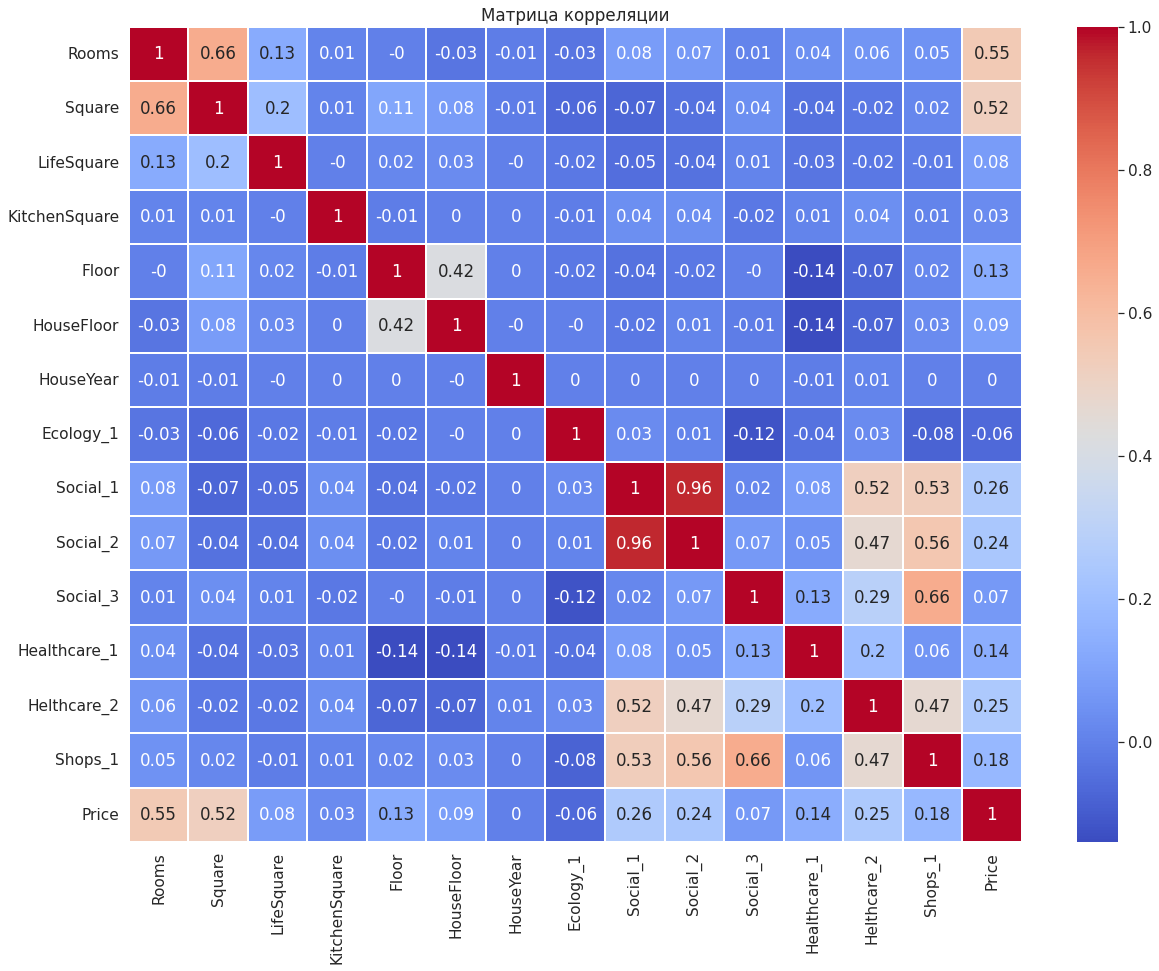

In [ ]:
plt.figure(figsize = (20,15))

sns.set(font_scale=1.4)

corr_matrix = df_train.corr()
corr_matrix = np.round(corr_matrix, 2)

sns.heatmap(corr_matrix, annot=True, linewidths=1, cmap='coolwarm')

plt.title('Матрица корреляции')
plt.show()

Целевая переменная Price

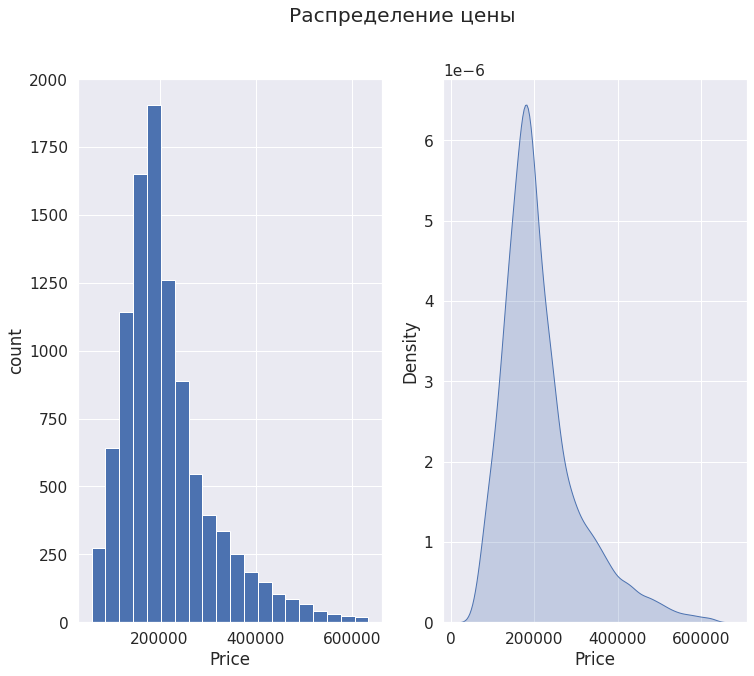

In [ ]:
plt.figure(figsize = (12, 10))
plt.subplot(121)
df_train['Price'].hist(density = False, bins = 20)
plt.ylabel('count')
plt.xlabel('Price')

plt.subplot(122)
sns.kdeplot(df_train['Price'], shade = True, legend = False)
plt.xlabel('Price')

plt.suptitle('Распределение цены')
plt.show()

# Подготовка данных

Обработка выбросов и пропусков

In [ ]:
class DataPreprocessing:
  """ Подготовка исходных данных """

  def __init__(self):
    """ Параметры класса """
    self.medians = None
    self.kitchen_squaere_quantile = None

  def fit (self, X):
    """ Сохранение статистик """
    self.medians = X.median()
    self.kitchen_squaere_quantile = X['KitchenSquare'].quantile(.975)

  def transform(self, X):
    """ Трансформация данных"""
    # Rooms
    X.loc[(X['Rooms'] == 0, 'Rooms')] = 1
    X.loc[(X['Rooms'] >=5, 'Rooms')] = 5

    #KitchenSquare
    condition = (X['KitchenSquare'].isna()) \
             | (X['KitchenSquare'] > X['KitchenSquare'].quantile(.975))
        
    X.loc[condition, 'KitchenSquare'] = df_train['KitchenSquare'].median()
    X.loc[X['KitchenSquare'] < 1, 'KitchenSquare'] = 1

    #HouseFloor, Floor

    X['HouseFloor_outlier'] = 0
    X.loc[X['HouseFloor'] == 0, 'HouseFloor_outlier'] = 1
    X.loc[X['Floor'] > X['HouseFloor'], 'HouseFloor_outlier'] = 1

    X.loc[X['HouseFloor'] == 0, 'HouseFloor'] = X['HouseFloor'].median()

    floor_outliers = X.loc[X['Floor'] > X['HouseFloor']].index

    X.loc[floor_outliers, 'Floor'] = X.loc[floor_outliers, 'HouseFloor']\
                                        .apply(lambda x:random.randint(1, x) )

    #HouseYear
    
    current_year = datetime.now().year
      
    X['HouseYear_outlier'] = 0
    X.loc[X['HouseYear'] > 2020, 'HouseYear_outlier'] = 1
    def HouseYear_cat(X):
      X.loc[X['HouseYear'] == 4968, 'HouseYear'] = 1968
      X.loc[X['HouseYear'] == 20052011, 'HouseYear'] = 2008

      return X
      X = HouseYear_cat(X)


    #LifeSquare

    X['LifeSquare_nan'] = X['LifeSquare'].isna() * 1
    
    condition = (df_train['LifeSquare'].isna()) \
            & (~ df_train['Square'].isna()) \
            & (~ df_train['KitchenSquare'].isna())

    # Healthcare_1
    if 'Healthcare_1' in X.columns:
            X.drop('Healthcare_1', axis=1, inplace=True)

    X.fillna(self.medians, inplace = True) 

    return X      

Построение новых фич

In [ ]:
class FeatureGenetator():
    """Генерация новых фич"""
    
    def __init__(self):
        self.DistrictId_counts = None
        self.binary_to_numbers = None
        self.med_price_by_district = None
        self.med_price_by_floor_year = None
        self.house_year_max = None
        self.floor_max = None
        self.house_year_min = None
        self.floor_min = None
        self.district_size = None
        
    def fit(self, X, y=None):
        
        X = X.copy()
        
        # Binary features
        self.binary_to_numbers = {'A': 0, 'B': 1}
        
        # DistrictID
        self.district_size = X['DistrictId'].value_counts().reset_index() \
                               .rename(columns={'index':'DistrictId', 'DistrictId':'DistrictSize'})
                
        # Target encoding
        ## District, Rooms
        df = X.copy()
        
        if y is not None:
            df['Price'] = y.values
            
            self.med_price_by_district = df.groupby(['DistrictId', 'Rooms'], as_index=False).agg({'Price':'median'})\
                                            .rename(columns={'Price':'MedPriceByDistrict'})
            
            self.med_price_by_district_median = self.med_price_by_district['MedPriceByDistrict'].median()
            
        ## floor, year
        if y is not None:
            self.floor_max = df['Floor'].max()
            self.floor_min = df['Floor'].min()
            self.house_year_max = df['HouseYear'].max()
            self.house_year_min = df['HouseYear'].min()
            df['Price'] = y.values
            df = self.floor_to_cat(df)
            df = self.year_to_cat(df)
            self.med_price_by_floor_year = df.groupby(['year_cat', 'floor_cat'], as_index=False).agg({'Price':'median'}).\
                                            rename(columns={'Price':'MedPriceByFloorYear'})
            self.med_price_by_floor_year_median = self.med_price_by_floor_year['MedPriceByFloorYear'].median()
        

        
    def transform(self, X):
        
        # Binary features
        X['Ecology_2'] = X['Ecology_2'].map(self.binary_to_numbers)  # self.binary_to_numbers = {'A': 0, 'B': 1}
        X['Ecology_3'] = X['Ecology_3'].map(self.binary_to_numbers)
        X['Shops_2'] = X['Shops_2'].map(self.binary_to_numbers)
        
        # DistrictId, IsDistrictLarge
        X = X.merge(self.district_size, on='DistrictId', how='left')
        
        X['new_district'] = 0
        X.loc[X['DistrictSize'].isna(), 'new_district'] = 1
        
        X['DistrictSize'].fillna(5, inplace=True)
        
        X['IsDistrictLarge'] = (X['DistrictSize'] > 100).astype(int)
        
        # More categorical features
        X = self.floor_to_cat(X)  # + столбец floor_cat
        X = self.year_to_cat(X)   # + столбец year_cat
        
        # Target encoding
        if self.med_price_by_district is not None:
            X = X.merge(self.med_price_by_district, on=['DistrictId', 'Rooms'], how='left')
            X['MedPriceByDistrict'].fillna(self.med_price_by_district_median, inplace=True)
            
        if self.med_price_by_floor_year is not None:
            X = X.merge(self.med_price_by_floor_year, on=['year_cat', 'floor_cat'], how='left')
            X['MedPriceByFloorYear'].fillna(self.med_price_by_floor_year_median, inplace=True)
        
        return X
    
    def floor_to_cat(self, X):
        bins = [self.floor_min, 3, 5, 9, 15, self.floor_max]
        X['floor_cat'] = pd.cut(X['Floor'], bins=bins, labels=False)

        X['floor_cat'].fillna(-1, inplace=True)
        return X
     
    def year_to_cat(self, X):
        bins = [self.house_year_min, 1941, 1945, 1980, 2000, 2010, self.house_year_max]
        X['year_cat'] = pd.cut(X['HouseYear'], bins=bins, labels=False)

        X['year_cat'].fillna(-1, inplace=True)
        return X

 # Отбор признаков

In [ ]:
feature_names = ['Id', 'DistrictId','Rooms','Square','LifeSquare','KitchenSquare','Floor','HouseFloor','HouseYear','Ecology_1',
                 'Ecology_2','Ecology_3','Social_1','Social_2','Social_3','Helthcare_2','Shops_1','Shops_2']

new_feature_names =['Rooms_outlier','HouseFloor_outlier','LifeSquare_nan','DistrictSize','IsDistrictLarge','MedPriceByDistrict',
 'year_cat','floor_cat','MedPriceByFloorYear']

target_name = 'Price'

# Разбиение на Train и Test

In [ ]:
test_df = pd.read_csv(test_path)
train_df = pd.read_csv(train_path)

X = train_df.drop(columns=target_name)
y = train_df[target_name]

In [ ]:
X_train, X_valid, y_train, y_valid = train_test_split(X, y, test_size=0.15, shuffle=True, random_state=100)

In [ ]:
preprocessor = DataPreprocessing()
preprocessor.fit(X_train)

X_train = preprocessor.transform(X_train)
X_valid = preprocessor.transform(X_valid)
test_df = preprocessor.transform(test_df)

In [ ]:
X_train.shape, X_valid.shape, test_df.shape


((8500, 21), (1500, 21), (5000, 21))

In [ ]:
feature_generator = FeatureGenetator()
feature_generator.fit(X_train, y_train)

X_train = feature_generator.transform(X_train)
X_valid = feature_generator.transform(X_valid)
test_df = feature_generator.transform(test_df)

In [ ]:
X_train.shape, X_valid.shape, test_df.shape

((8500, 28), (1500, 28), (5000, 28))

# Построение модели

**Функция для оценки качества модели**

In [ ]:
def evaluate_preds(train_true_values, train_pred_values, test_true_values, test_pred_values):
    print("Train R2:\t" + str(round(r2(train_true_values, train_pred_values), 3)))
    print("Test R2:\t" + str(round(r2(test_true_values, test_pred_values), 3)))
    
    plt.figure(figsize=(18,10))
    
    plt.subplot(121)
    sns.scatterplot(x=train_pred_values, y=train_true_values)
    plt.xlabel('Predicted values')
    plt.ylabel('True values')
    plt.title('Train sample prediction')
    
    plt.subplot(122)
    sns.scatterplot(x=test_pred_values, y=test_true_values)
    plt.xlabel('Predicted values')
    plt.ylabel('True values')
    plt.title('Test sample prediction')

    plt.show()

Gradient Boosting

Train R2:	0.973
Test R2:	0.724


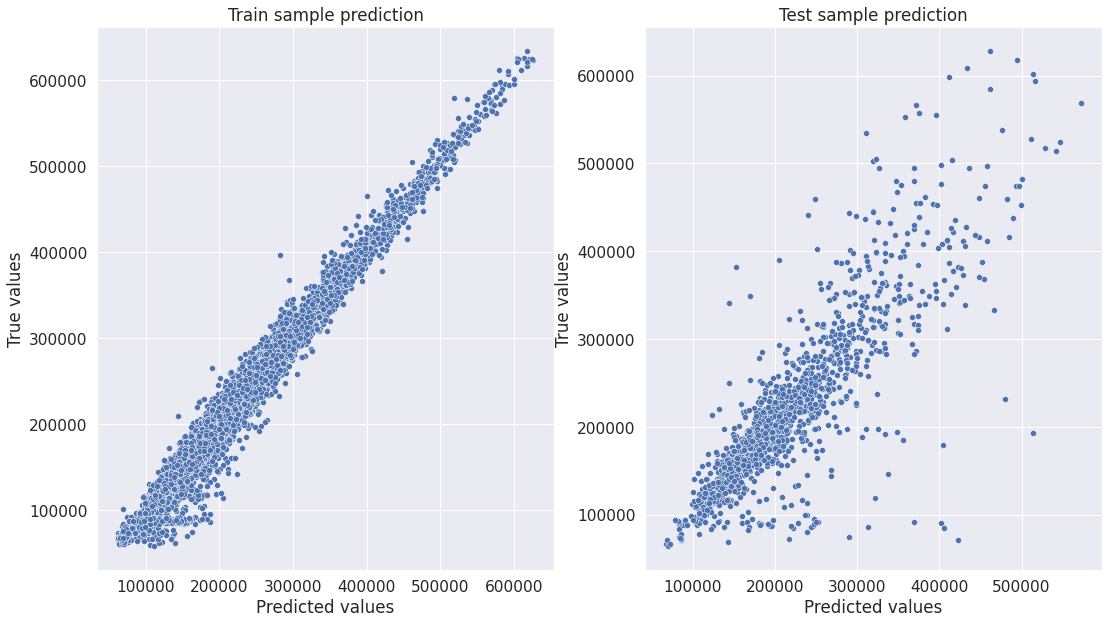

In [ ]:
gb = GradientBoostingRegressor(criterion = 'mse',
                                max_depth=8, 
                                min_samples_split=100, 
                                n_estimators=500, 

                                random_state=39)
gb.fit(X_train, y_train)
y_train_preds = gb.predict(X_train)
y_test_preds = gb.predict(X_valid)
evaluate_preds(y_train, y_train_preds, y_valid, y_test_preds)

# Прогнозирование на тестовых данных

---



In [ ]:
submit = pd.read_csv('/content/drive/MyDrive/Курсовой проект/sample_submission.csv')
submit.head()

Id     Price
0  4567  200000.0
1  5925  200000.0
2   960  200000.0
3  3848  200000.0
4   746  200000.0

In [ ]:
predictions = gb.predict(test_df)
predictions

array([169646.91679086, 120053.70531893, 131441.04633743, ...,
       146842.76140487, 191537.07090526, 263443.92745154])

In [ ]:
submit['Price'] = predictions
submit.head()

Id          Price
0  4567  169646.916791
1  5925  120053.705319
2   960  131441.046337
3  3848  136792.433819
4   746  175649.161506

In [ ]:
submit.to_csv('gb_submit.csv', index = False)